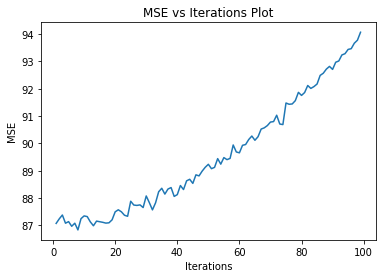

8


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
dataframe=pd.read_csv('D:\PRML Assignment 2\PRML Assignment 2\A2Q2Data_train.csv',header=None)
arr=dataframe.to_numpy()
#calculating gradient for ridge regression
def calc_ridge_grad(lmda,xxt,w,xy):
    return (2*np.dot(xxt,w)-2*xy)+2*w*lmda
def calc_error_y(x,w,y):
    y_pred=np.dot(w.transpose(),x)
    return round(np.sum(np.power(y-y_pred,2)),2)
    
train=arr[:8000]
train_xt=train[:,0:100]
train_x=train_xt.transpose()
train_yt=train[:,100]
train_y=train_yt.transpose()
validation=arr[8000:]
validation_xt=validation[:,0:100]
validation_x=np.transpose(validation_xt)
validation_y=np.transpose(validation[:,100])
xxt=np.dot(train_x,train_xt)
l_values=[]
l=[]
e=[]
# l_values=np.linalg.eigvals(xxt)
for i in range(0,100):
    l_values.append(i)
# i=0.0
# while(i<=10.0):
#     l_values.append(i)
#     i+=1
# print(l_values)
# l=np.random.random()
wr_prev=np.random.random(100)
xy=np.dot(train_x,train_y)
min_error=1000000
lmda_min=1000000
eta=1/300000
for i in range(1,len(l_values)):
    lmda=l_values[i]
    diff=999
    wr_prev=np.random.random(100)
    error1=0
    while(diff>0.001):
        wr_curr=wr_prev-eta*calc_ridge_grad(lmda,xxt,wr_prev,xy)
        error2=error1
        error1=calc_error_y(train_x,wr_prev,train_y)
        diff=abs(error1-error2)
        wr_prev=wr_curr
    validation_y_pred=np.dot(wr_curr.transpose(),validation_x)
    error=np.sum(np.power(validation_y-validation_y_pred,2))
    # print(error,lmda)
    l.append(lmda)
    e.append(error)
    if(error<min_error):
        min_error=error
        lmda_min=lmda
        w_r=wr_curr
plt.plot(l,e)
plt.title("MSE vs Iterations Plot" )
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()
print(lmda_min)